In [107]:
import matplotlib.pyplot as plt
import numpy as np
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

import jsm_prephalo
import mcmc_aux
import galhalo
import os

from scipy import stats
from numpy.random import poisson

In [58]:
lgMs = jsm_prephalo.prep_data("../../data/3000_12_8/acc_surv_mass.npy", convert=True, includenan=False)
#not sorted but it doesn't need to be since we only care if a satellite is more massive than 6.5


https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/#

In [59]:
Nsamp = 100
Nsets = int(lgMs.shape[0]/Nsamp) #dividing by the number of samples
print("dividing your sample into", Nsets-1, "sets")
set_ind = np.arange(0,Nsets)*Nsamp


lgMs_mat = np.zeros(shape=(Nsets-1, Nsamp, lgMs.shape[1]))
for i in range(Nsets-1):
    lgMs_mat[i] = lgMs[set_ind[i]:set_ind[i+1]]

dividing your sample into 30 sets


In [60]:
lgMs_mat.shape

min_mass = 6.5

N_mat = np.sum(lgMs_mat > min_mass, axis = 2)

M_max_mat = np.max(lgMs_mat, axis=2)

N_bins = np.linspace(0,17,18)

M_bins = np.linspace(6,11,18)

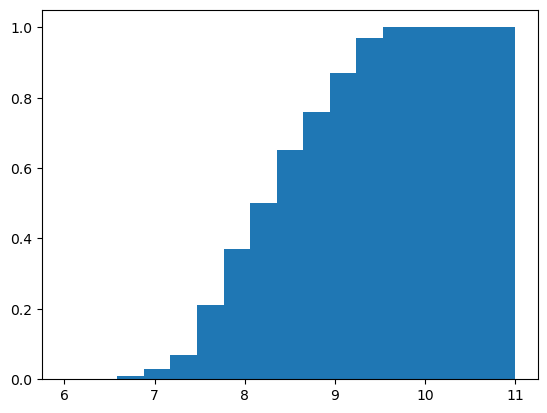

In [61]:
wow = plt.hist(M_max_mat[0], bins=M_bins, density=True, cumulative=True)[0]

In [62]:
def PDF(data, bins):

    count = np.histogram(data, bins)[0]
    return count / sum(count)

def CDF(data, bins):
    
    count = np.histogram(data, bins)[0]
    pdf = count / sum(count)
    return np.cumsum(pdf)

#stat1

PDF_stat1_mat = np.apply_along_axis(PDF, 1, N_mat, N_bins)

PDF_stat1_ave = np.average(PDF_stat1_mat, axis=0)

CDF_stat1_mat = np.apply_along_axis(CDF, 1, N_mat, N_bins)

CDF_stat1_ave = np.average(CDF_stat1_mat, axis=0)

#stat2

PDF_stat2_mat = np.apply_along_axis(PDF, 1, M_max_mat, M_bins)

PDF_stat2_ave = np.average(PDF_stat2_mat, axis=0)

CDF_stat2_mat = np.apply_along_axis(CDF, 1, M_max_mat, M_bins)

CDF_stat2_ave = np.average(CDF_stat2_mat, axis=0)



In [70]:
N_bins

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [71]:
M_bins[np.where(PDF_stat2_ave == max(PDF_stat2_ave))[0][0]]

8.058823529411764

In [87]:
def PDFplot_S1(data, ave, bins):

    pdata = poisson(6.5, 10000)
    pcounts = PDF(pdata, bins)    
    plt.plot(bins[1:], pcounts, label="Poisson", color="red", ls="--")

    plt.step(bins[1:], data[0], label="example data", color="green")
    
    plt.step(bins[1:], ave, label="30 sample average", color="black")

    plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
    plt.ylabel("PDF", fontsize=15)
    plt.legend(fontsize=12)
    plt.show()

def CDFplot_S1(data, ave, bins):

    pdata = poisson(6.5, 10000)
    pcounts = CDF(pdata, bins)    
    plt.plot(bins[1:], pcounts, label="Poisson", color="red", ls="--")

    plt.step(bins[1:], data[0], label="example data", color="green")
    
    plt.step(bins[1:], ave, label="30 sample average", color="black")

    plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
    plt.ylabel("CDF", fontsize=15)
    plt.legend(fontsize=12)
    plt.show()

In [91]:
def PDFplot_S2(data, ave, bins):

    pdata = poisson(8,1000)
    pdata_x = np.linspace(6,11,50)
    pcounts = PDF(pdata, pdata_x)  
    plt.scatter(pdata_x, pcounts, label="Poisson", color="red", ls="--")

    plt.step(bins[1:], data[0], label="example data", color="green")
    
    plt.step(bins[1:], ave, label="30 sample average", color="black")

    plt.xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
    plt.ylabel("PDF", fontsize=15)
    plt.legend(fontsize=12)

    plt.show()


In [124]:
pdata = poisson(8,1000)
pdata_x = np.linspace(0,12,50)
pcounts = PDF(pdata, pdata_x)  

In [125]:
pdata_x.shape

(50,)

In [126]:
pcounts.shape

(49,)

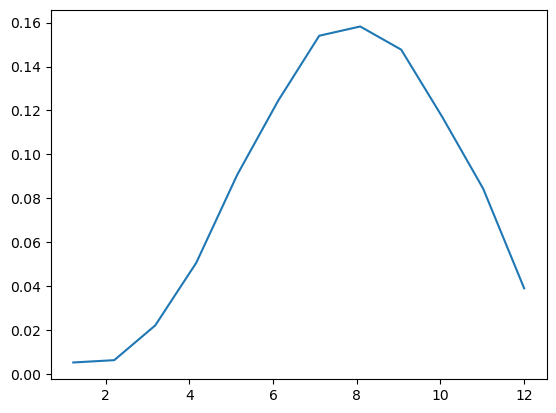

In [129]:
mask = pcounts > 0.0

plt.plot(pdata_x[1:][mask], pcounts[mask])


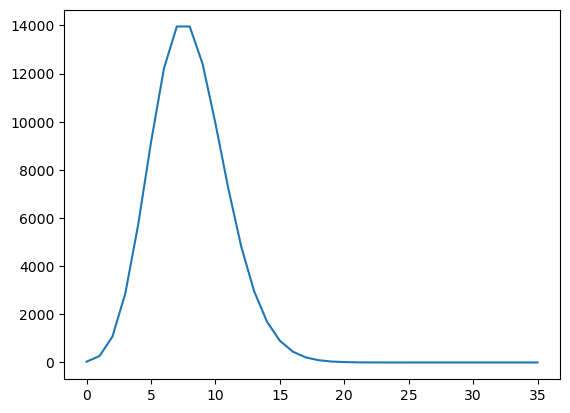

In [104]:
from scipy.stats import poisson

plt.plot(poisson.pmf(np.linspace(0, 35, 36),8)*100000)


In [ ]:
PDFplot_S2(PDF_stat2_mat, PDF_stat2_ave, M_bins)


In [ ]:

def CDFplot_S2(data, ave, bins):

    pdata = poisson(8, 10000)
    pcounts = CDF(pdata, bins)  
    plt.scatter(bins[1:], pcounts, label="Poisson", color="red", ls="--")

    plt.step(bins[1:], data[0], label="example data", color="green")
    
    plt.step(bins[1:], ave, label="30 sample average", color="black")

    plt.xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
    plt.ylabel("CDF", fontsize=15)
    plt.legend(fontsize=12)
    plt.show()

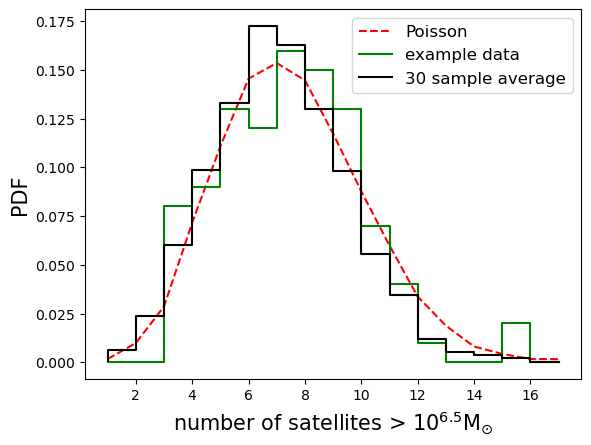

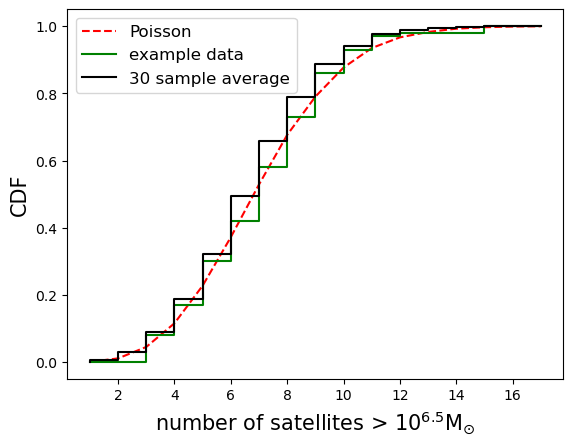

In [92]:
PDFplot_S1(PDF_stat1_mat, PDF_stat1_ave, N_bins)

CDFplot_S1(CDF_stat1_mat, CDF_stat1_ave, N_bins)

ValueError: x and y must be the same size

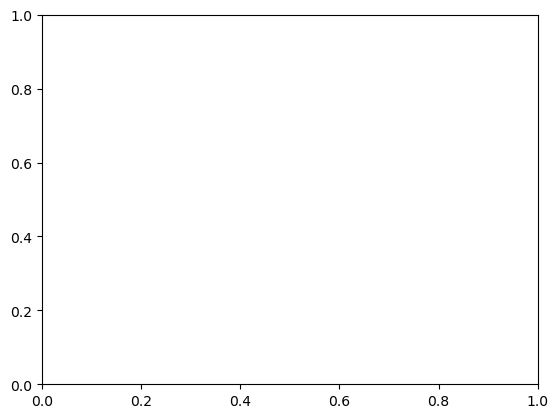

In [94]:
PDFplot_S2(PDF_stat2_mat, PDF_stat2_ave, M_bins)

CDFplot_S2(CDF_stat2_mat, CDF_stat2_ave, M_bins)

https://github.com/vinyluis/Articles/blob/main/Kolmogorov-Smirnov/Kolmogorov-Smirnov.ipynb

follow the above notebook to write your own!

okay so in combination these two statistics - the PDF of the number of satellites more massive than 6.5 and the CDF of the stellar mass of the most massive satellite - already encompas the halo to halo variance! each one of the stats is per host! that means that plotting the distribution shows how much each SAGA sample of 100 hosts differs. now to measure the likelyhood and combine them!

https://www.statisticshowto.com/likelihood-function-definition/